In [151]:
import sqlite3

from main import setup1, setup2

# setup1()
# setup2()

# from django.db import connection 

import psycopg2

In [152]:
# from asgiref.sync import sync_to_async

# @sync_to_async
def run_query(query, fetch=True):
    result = None
    try:
        connection = psycopg2.connect("dbname=data user=root password=root")
        # Connect to DB and create a cursor
        # sqlite_connection = sqlite3.connect('db.sqlite3')
        cursor = connection.cursor()
        cursor.execute(query) 
        # Fetch and output result
        if fetch:
            result = cursor.fetchall()
        else:
            connection.commit()
        # Close the cursor
        cursor.close()
        
    # Handle errors
    # except sqlite3.Error as error:
        # print('Error occurred - ', error)
 
    # Close DB Connection irrespective of success
    # or failure
    finally:
        if connection:
            connection.close()
    return result

In [153]:
def read_file(file_path):
    try:
        with open(file_path, 'r') as file:
            content = file.read()
        return content
    except FileNotFoundError:
        return None
    # except IOError as e:
    #     return None
    

def run_query_file(path, fetch=True):
    query = read_file(path)
    return run_query(query, fetch=fetch)

In [154]:
run_query_file(
    'sql_queries/views/games_with_numplayers.sql',
    fetch=False
)
run_query_file(
    'sql_queries/views/player_with_numturns.sql',
    fetch=False
)
run_query_file(
    'sql_queries/views/player_game_pair.sql',
    fetch=False
)

InvalidTableDefinition: cannot drop columns from view


In [155]:

rows = run_query_file(
    'sql_queries/averages.sql'
)

print("name, numplayers, avg(number_of_turns), stddev (number_of_turns), variance (number_of_turns), min(number_of_turns), max(number_of_turns)")
for row in rows:
    print(", ".join([str(i) for i in row]))


name, numplayers, avg(number_of_turns), stddev (number_of_turns), variance (number_of_turns), min(number_of_turns), max(number_of_turns)
NewBiggestFirst, 1, 13.5780000000000000, 4.4239673922269689, 19.5714874874874875, 4, 43
NewBiggestFirst, 2, 13.7040000000000000, 4.7754146569995963, 22.8045851462865716, 4, 54
NewBiggestFirst, 3, 13.6206666666666667, 4.7547387743552868, 22.6075408123576152, 4, 59
Replacement, 1, 13.5960000000000000, 5.5883820569118227, 31.2300140140140140, 4, 90
Replacement, 2, 13.8845000000000000, 7.1363079721147277, 50.9268914728682171, 4, 153
Replacement, 3, 14.4341666666666667, 13.0344920231900863, 169.8979823026059899, 4, 507
Tunnels, 1, 14.1550000000000000, 4.3094717247647126, 18.5715465465465465, 5, 41
Tunnels, 2, 14.2337500000000000, 4.5435968137040258, 20.6442720055013753, 4, 43
Tunnels, 3, 14.1443333333333333, 4.4154370002155733, 19.4960839028727010, 4, 41


In [167]:
import matplotlib.pyplot as plt 
import numpy as np

query_1 = '''
    SELECT
        name, numplayers
    FROM
        player_game_pair
    GROUP BY
        name, numplayers
    ORDER BY
        name, numplayers
    '''

players = run_query(
    query_1
)
print(players)
print(f"{len(players)} number of players")
def make_graph_for(player, ax):
    name, numplayers = player
    query_1 = '''
        SELECT
            number_of_turns
        FROM
            player_with_numturns
        WHERE name = '{}' AND numplayers = {}        
        
        '''.format(name, numplayers)

    data= run_query(
        query_1
    )
    data = [i[0] for i in data]
    # Define the bin edges for groups of 5
    bin_size = 2
    mx = max(data)
    mx = 100
    bin_edges = range(0, mx + bin_size, bin_size)

    # Create histogram
    ax.hist(data, bins=bin_edges, edgecolor='black')

    # Add titles and labels
    ax.set_title(f'{name}, {numplayers} players')
    
    # ax.xlabel('Value Range')
    # ax.ylabel('Frequency')



[('NewBiggestFirst', 1), ('NewBiggestFirst', 2), ('NewBiggestFirst', 3), ('Replacement', 1), ('Replacement', 2), ('Replacement', 3), ('Tunnels', 1), ('Tunnels', 2), ('Tunnels', 3)]
9 number of players


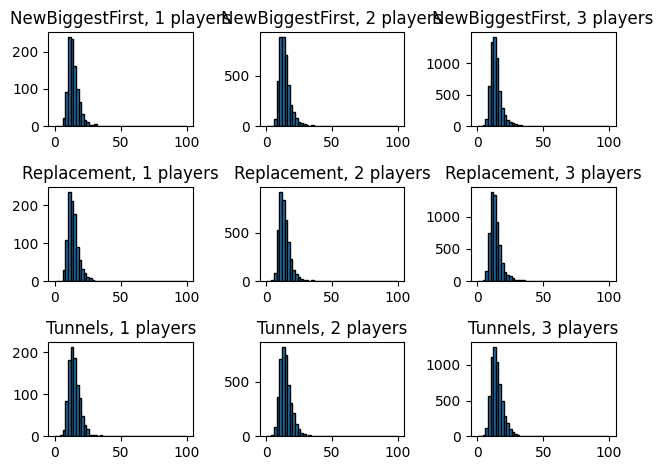

In [168]:
fig, ax = plt.subplots(3, 3)
# plt.subplots_adjust(wspace=2, hspace=2)

for i in range(3):
    for j in range(3):
        make_graph_for(players[3*i + j], ax[i][j])
        
plt.tight_layout()

In [71]:


# def make_graph_for(player):
#     name, numplayers = player
#     query_1 = '''
#         SELECT
#             number_of_turns
#         FROM
#             player_with_numturns
#         WHERE name = '{}' AND numplayers = {}        
        
#         '''.format(name, numplayers)
#     data= run_query(
#         query_1
#     )
    
#     data = [i[0] for i in data]
#     bin_size = 2
#     mx = max(data)
#     mx = 100
#     bin_edges = range(0, mx + bin_size, bin_size)

#     # Create histogram
#     plt.hist(data, bins=bin_edges, edgecolor='black', histtype='step')
# plt.title(players[0][0])
# make_graph_for(players[0])
# make_graph_for(players[1])
# make_graph_for(players[2])
# plt.show()

In [72]:
# plt.title(players[3][0])
# make_graph_for(players[3])
# make_graph_for(players[4])
# make_graph_for(players[5])
# plt.show()

In [73]:
# plt.title(players[6][0])
# make_graph_for(players[6])
# make_graph_for(players[7])
# make_graph_for(players[8])
# plt.show()

In [169]:
import pandas as pd

def get_df():
    query_1 = '''
        SELECT
            number_of_turns, name, numplayers
        FROM
            player_with_numturns
        '''
    data= run_query(
        query_1
    )
    
    data = {
        'numturns':[i[0] for i in data],
        'name':[i[1] for i in data],
        'numplayers':[i[2] for i in data]
    }

    df = pd.DataFrame(data)
    return df



In [170]:

# Get summary statistics
df = get_df()
statistics = df.groupby(['name', 'numplayers']).describe()
statistics

numturns                                         \
                              count       mean        std  min   25%   50%   
name            numplayers                                                   
NewBiggestFirst 1            1000.0  13.578000   4.423967  4.0  11.0  13.0   
                2            4000.0  13.704000   4.775415  4.0  11.0  13.0   
                3            6000.0  13.620667   4.754739  4.0  11.0  13.0   
Replacement     1            1000.0  13.596000   5.588382  4.0  10.0  13.0   
                2            4000.0  13.884500   7.136308  4.0  10.0  13.0   
                3            6000.0  14.434167  13.034492  4.0  10.0  12.0   
Tunnels         1            1000.0  14.155000   4.309472  5.0  11.0  14.0   
                2            4000.0  14.233750   4.543597  4.0  11.0  14.0   
                3            6000.0  14.144333   4.415437  4.0  11.0  13.0   

                                          
                              75%    max  
name            numplayers                
NewBiggestFirst 1           15.00   43.0  
                2           15.00   54.0  
                3           15.00   59.0  
Replacement     1           15.00   90.0  
                2           15.00  153.0  
                3           15.00  507.0  
Tunnels         1           16.25   41.0  
                2           17.00   43.0  
                3           17.00   41.0

In [81]:








# # Get summary statistics
# df = get_df(players[1])
# statistics = df.describe()
# print(players[1][0] , ',', players[1][1])
# statistics

In [82]:


# # Get summary statistics
# df = get_df(players[2])
# statistics = df.describe()
# print(players[2][0] , ',', players[2][1])
# statistics

In [171]:
# query_1 = '''
#     SELECT
#         count(turns.id) as number_of_turns,
#         turns.game_id as game_id,
#         player.name as name,
#         turns.turn_type as type
#     FROM
#         db_player as player
#     JOIN 
#         db_turn as turns ON turns.player_id = player.id
#     GROUP BY
#         turns.game_id,
#         turns.player_id,
#         turns.turn_type
#     '''
# query_2 = '''
#     SELECT
#         avg(number_of_turns),
#         name,
#         type
#     FROM
#         ({})
#     GROUP BY
#         name,
#         type
# '''.format(query_1)

# data = run_query(
#     query_2
# )



SyntaxError: subquery in FROM must have an alias
LINE 7:         (
                ^
HINT:  For example, FROM (SELECT ...) [AS] foo.


In [ ]:

"""select name, count(game_id) from (SELECT
        count(turns.id) as number_of_turns,
        turns.game_id as game_id,
        player.name as name,
        turns.turn_type as type
    FROM
        db_player as player
    JOIN 
        db_turn as turns ON turns.player_id = player.id
    GROUP BY
        turns.game_id,
        turns.player_id,
        turns.turn_type
        ) where number_of_turns > 100 GROUP BY name"""


In [172]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h



In [173]:
from statistics import NormalDist

def confidence_interval(data, confidence=0.95):
  dist = NormalDist.from_samples(data)
  z = NormalDist().inv_cdf((1 + confidence) / 2.)
  h = dist.stdev * z / ((len(data) - 1) ** .5)
  return dist.mean - h, dist.mean + h



In [174]:
for player in players:
    name, numplayers = player
    df = get_df()
    df1 = df[(df['name'] == name) & (df['numplayers'] == numplayers)] # df.query(f'name == "{name}"').query(f'numplayers == {numplayers}')    
    mean, low, high = mean_confidence_interval(df1['numturns'])
    print(f'name={ name:15} #players={ numplayers } mean={ float(mean):5.5f} low={ float(low):5.5f} high={ float(high):5.5f} size={ len(df1.index):4d}')

name=NewBiggestFirst #players=1 mean=13.57800 low=13.30347 high=13.85253 size=1000
name=NewBiggestFirst #players=2 mean=13.70400 low=13.55597 high=13.85203 size=4000
name=NewBiggestFirst #players=3 mean=13.62067 low=13.50033 high=13.74100 size=6000
name=Replacement     #players=1 mean=13.59600 low=13.24921 high=13.94279 size=1000
name=Replacement     #players=2 mean=13.88450 low=13.66328 high=14.10572 size=4000
name=Replacement     #players=3 mean=14.43417 low=14.10429 high=14.76405 size=6000
name=Tunnels         #players=1 mean=14.15500 low=13.88758 high=14.42242 size=1000
name=Tunnels         #players=2 mean=14.23375 low=14.09290 high=14.37460 size=4000
name=Tunnels         #players=3 mean=14.14433 low=14.03259 high=14.25608 size=6000


In [178]:

def ttest(player1, player2):
    name1, numplayers1 = player1
    name2, numplayers2 = player2
    df = get_df()
    df1 = df[(df['name'] == name1) & (df['numplayers'] == numplayers1)]
    df2 = df[(df['name'] == name2) & (df['numplayers'] == numplayers2)]

    r = scipy.stats.ttest_ind(df1['numturns'], df2['numturns'], equal_var=False)
    print(f"{name1}({numplayers1}) v {name2}({numplayers2}) {r.statistic}, {r.pvalue}")

In [180]:
ttest(players[0], players[3])
ttest(players[0], players[6])
ttest(players[3], players[6])

NewBiggestFirst(1) v Replacement(1) -0.0798609056271416, 0.9363563021989966
NewBiggestFirst(1) v Tunnels(1) -2.9543925224098397, 0.0031695008998959256
Replacement(1) v Tunnels(1) -2.5048996494021427, 0.012332781345289083


In [184]:
ttest(players[1+0], players[1+3])
ttest(players[1+0], players[1+6])
ttest(players[1+3], players[1+6])

NewBiggestFirst(2) v Replacement(2) -1.329476717398219, 0.18373417610553552
NewBiggestFirst(2) v Tunnels(2) -5.082902536303163, 3.8015491056860035e-07
Replacement(2) v Tunnels(2) -2.610942886109693, 0.009049165602673354


In [185]:
ttest(players[2+0], players[2+3])
ttest(players[2+0], players[2+6])
ttest(players[2+3], players[2+6])

NewBiggestFirst(3) v Replacement(3) -4.541628278344071, 5.668580428974369e-06
NewBiggestFirst(3) v Tunnels(3) -6.251306784074625, 4.209169024537581e-10
Replacement(3) v Tunnels(3) 1.6313260551273183, 0.1028643350661879


In [181]:
ttest(players[0], players[1])
ttest(players[0], players[2])
ttest(players[1], players[2])

NewBiggestFirst(1) v NewBiggestFirst(2) -0.792583985708352, 0.42813549606710233
NewBiggestFirst(1) v NewBiggestFirst(3) -0.27928252957255284, 0.7800689139340321
NewBiggestFirst(2) v NewBiggestFirst(3) 0.8563771996227454, 0.39181318913422547


In [182]:
ttest(players[3+0], players[3+1])
ttest(players[3+0], players[3+2])
ttest(players[3+1], players[3+2])

Replacement(1) v Replacement(2) -1.3759681973075635, 0.16899358495106598
Replacement(1) v Replacement(3) -3.4348109028679916, 0.0006005244140772999
Replacement(2) v Replacement(3) -2.7130207687704897, 0.006679092557523114


In [183]:
ttest(players[6+0], players[6+1])
ttest(players[6+0], players[6+2])
ttest(players[6+1], players[6+2])

Tunnels(1) v Tunnels(2) -0.511184609246501, 0.6092923017536984
Tunnels(1) v Tunnels(3) 0.07220918697104146, 0.9424459574425295
Tunnels(2) v Tunnels(3) 0.975011537250878, 0.32958261372459285


In [ ]:
'''
 * ( ) record computational time
 * ( ) Higher computational time will correlate with game performance (# turns to win)
 * ( ) Having the first turn will correlate with win %
 * ( ) Lower # cards drawn and immediately discarded will correlate with lower # turns to win (better game performance)
 * ( ) Higher # discards used will correlate with lower # turns to win (better game performance)
 * (✓) Replacement will outperform Tunnels which will outperform BiggestFirst
'''